In [2]:
import numpy as np
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import re
from datetime import date, time, datetime, timedelta
from dateutil.relativedelta import relativedelta

#**Alumni - Odontologias.**<br>

**Relatório:** https://docs.google.com/document/d/1ayk2Trhf0rB8-6QF7qSnA_pK61oN-UcooWfW_Rx30U4/edit?usp=sharing

Atualização: 08/12/2021 <br>

Responsável: Gustavo de Andrade<br>
gustavo@if.usp.br
<br>


#**O primeiro dataframe é do "Acesso à plafatorma - Primeiro Acesso"**

In [9]:
dados = pd.read_csv("Dashboard Alumni USP_Primeiro Acesso_Tabela dinâmica.csv")

In [10]:
dados

,Y,M,D,login_status,genre,Record Count
0,2019,12,12,Complete,Female,1
1,2018,3,2,Complete,Female,1
2,2018,8,29,Complete,Male,9
3,2017,1,7,Complete,Female,1
4,2016,10,27,Incomplete,Female,4
...,...,...,...,...,...,...
1966,2021,11,5,Complete,Male,1
1967,2021,12,1,Complete,Female,1
1968,2021,11,11,Complete,Female,1
1969,2021,11,22,Incomplete,Male,1


In [11]:
dados1 = pd.DataFrame()
dados1['anos'] = dados['Y']
dados1['total'] = dados['Record Count']

In [12]:
dados1

,anos,total
0,2019,1
1,2018,1
2,2018,9
3,2017,1
4,2016,4
...,...,...
1966,2021,1
1967,2021,1
1968,2021,1
1969,2021,1


In [13]:
evol = pd.DataFrame()
evol['total'] = dados.groupby(['Y'], as_index = True )['Record Count'].sum()
evol = pd.DataFrame(evol)
evol

,total
Y,
2016,252
2017,654
2018,820
2019,567
2020,830
2021,589


In [14]:
evol = pd.DataFrame([[252],[906],[1726],[2293],[3123],[3709]], columns=['Total'], index=["2016", "2017","2018","2019","2020","2021"])
evol

,Total
2016,252
2017,906
2018,1726
2019,2293
2020,3123
2021,3709


Text(0.5, 1.0, 'Inscritros no ALUMNI - Odontologias')

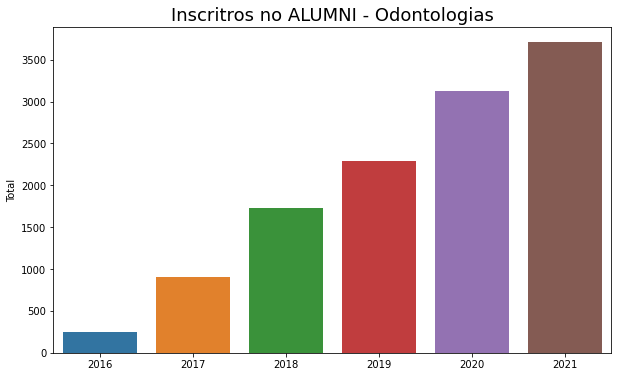

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data=evol, x=evol.index, y='Total')
plt.title('Inscritros no ALUMNI - Odontologias', fontsize=18)

Text(0.5, 1.0, 'Inscritros no ALUMNI - Odontologias')

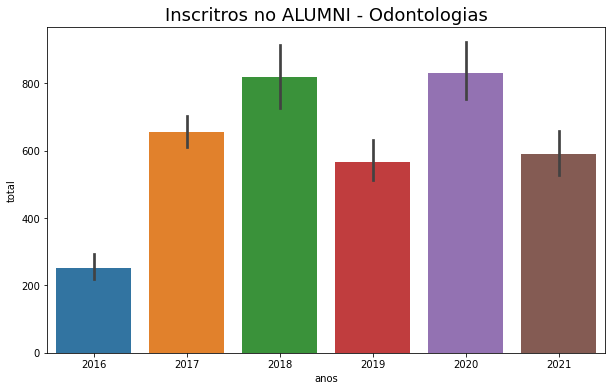

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dados1, x='anos', y='total', estimator=sum)
plt.title('Inscritros no ALUMNI - Odontologias', fontsize=18)

In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Y             1971 non-null   int64 
 1   M             1971 non-null   int64 
 2   D             1971 non-null   int64 
 3   login_status  1971 non-null   object
 4   genre         1971 non-null   object
 5   Record Count  1971 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 92.5+ KB


In [18]:
n = 0
data_e_hora_em_texto = str(dados['Y'][n]) + '-' + str(dados['M'][n]) +  '-' + str(dados['D'][n])

In [19]:
data_e_hora_em_texto

'2019-12-12'

In [20]:
n = 0    
lista = []
while n < len(dados):
    lista_insert = str(dados['Y'][n]) + '-' + str(dados['M'][n]) +  '-' + str(dados['D'][n])
    lista.insert(n, lista_insert)
    n += 1

In [21]:
dados['data'] = lista

In [22]:
dados['data'] = dados['data'].astype('datetime64[ns]')
dados

,Y,M,D,login_status,genre,Record Count,data
0,2019,12,12,Complete,Female,1,2019-12-12
1,2018,3,2,Complete,Female,1,2018-03-02
2,2018,8,29,Complete,Male,9,2018-08-29
3,2017,1,7,Complete,Female,1,2017-01-07
4,2016,10,27,Incomplete,Female,4,2016-10-27
...,...,...,...,...,...,...,...
1966,2021,11,5,Complete,Male,1,2021-11-05
1967,2021,12,1,Complete,Female,1,2021-12-01
1968,2021,11,11,Complete,Female,1,2021-11-11
1969,2021,11,22,Incomplete,Male,1,2021-11-22


In [23]:
data_dados = pd.DataFrame()
data_dados

""


In [24]:
data_dados['total'] = dados.groupby(['data'])['Record Count'].sum()
data_dados

,total
data,
2016-09-16,1
2016-09-20,1
2016-10-05,2
2016-10-11,2
2016-10-12,8
...,...
2021-12-01,3
2021-12-02,2
2021-12-03,1


In [25]:
fig = px.area(dados, facet_col="genre",  x='data', y='Record Count')
fig.update_layout(bargap=0.1)
fig.show()

In [26]:
fig = px.area(dados, x='data', y='Record Count')
fig.show()

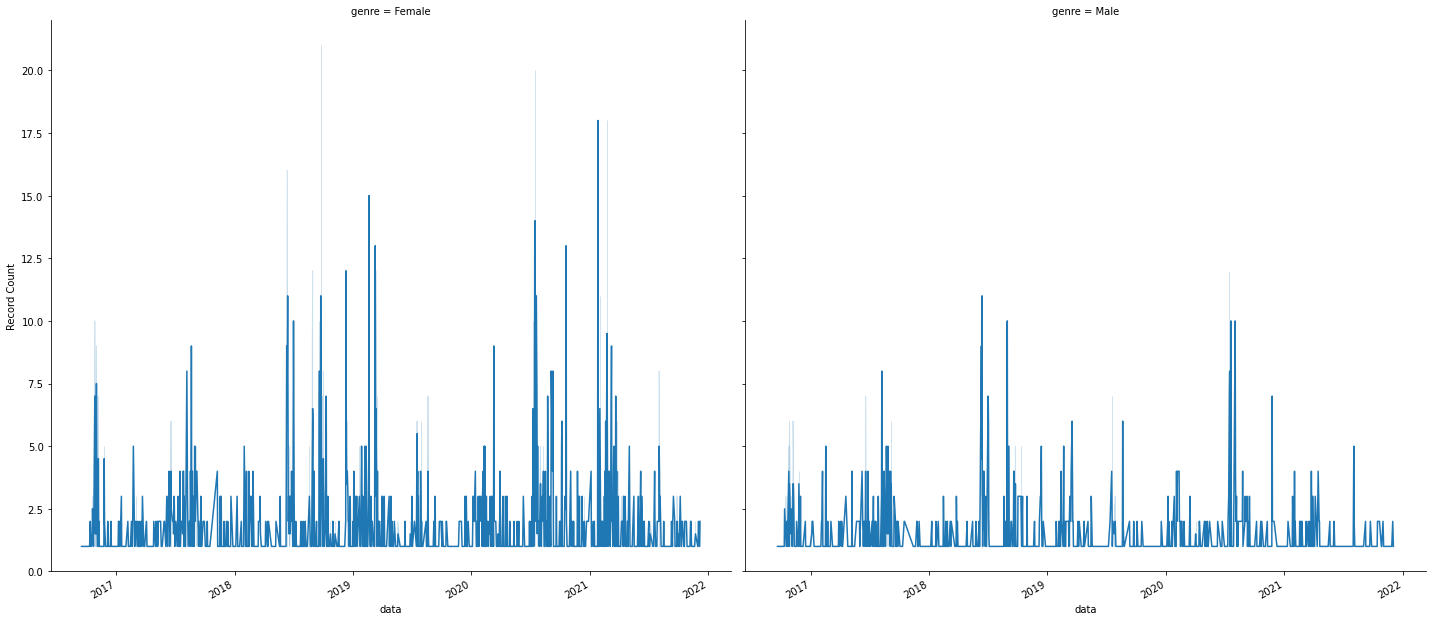

In [27]:
g = sns.relplot(x="data", y="Record Count", kind="line", data=dados, col="genre", height=10)
g.figure.autofmt_xdate()

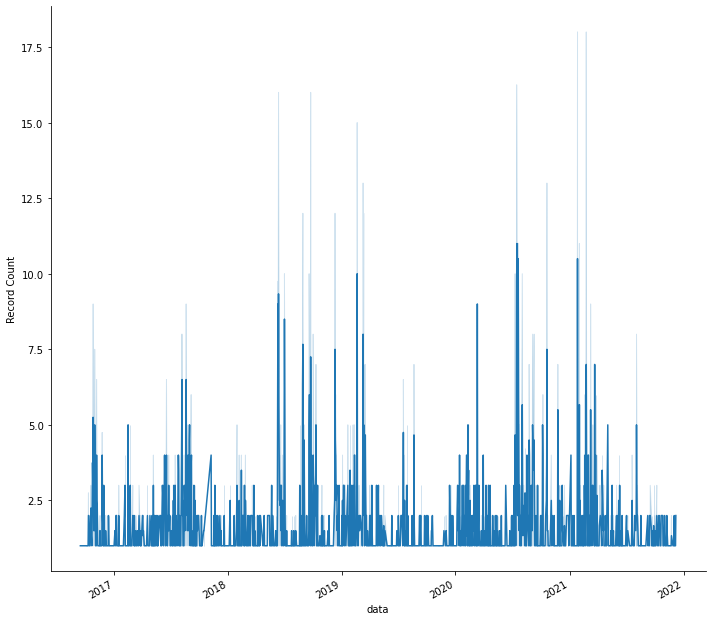

In [28]:
g = sns.relplot(x="data", y="Record Count", kind="line", data=dados, height=10)
g.figure.autofmt_xdate()

In [29]:
dados['mes_ano'] = dados['data'].map(lambda x: 100*x.year + x.month)
dados_mes = dados.groupby(['mes_ano'])['Record Count'].sum().reset_index()

In [30]:
dados

,Y,M,D,login_status,genre,Record Count,data,mes_ano
0,2019,12,12,Complete,Female,1,2019-12-12,201912
1,2018,3,2,Complete,Female,1,2018-03-02,201803
2,2018,8,29,Complete,Male,9,2018-08-29,201808
3,2017,1,7,Complete,Female,1,2017-01-07,201701
4,2016,10,27,Incomplete,Female,4,2016-10-27,201610
...,...,...,...,...,...,...,...,...
1966,2021,11,5,Complete,Male,1,2021-11-05,202111
1967,2021,12,1,Complete,Female,1,2021-12-01,202112
1968,2021,11,11,Complete,Female,1,2021-11-11,202111
1969,2021,11,22,Incomplete,Male,1,2021-11-22,202111


In [31]:
dados_mes = dados_mes.append(dados_mes)

In [32]:
dados_mes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   mes_ano       128 non-null    int64
 1   Record Count  128 non-null    int64
dtypes: int64(2)
memory usage: 3.0 KB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text major ticklabel objects>)

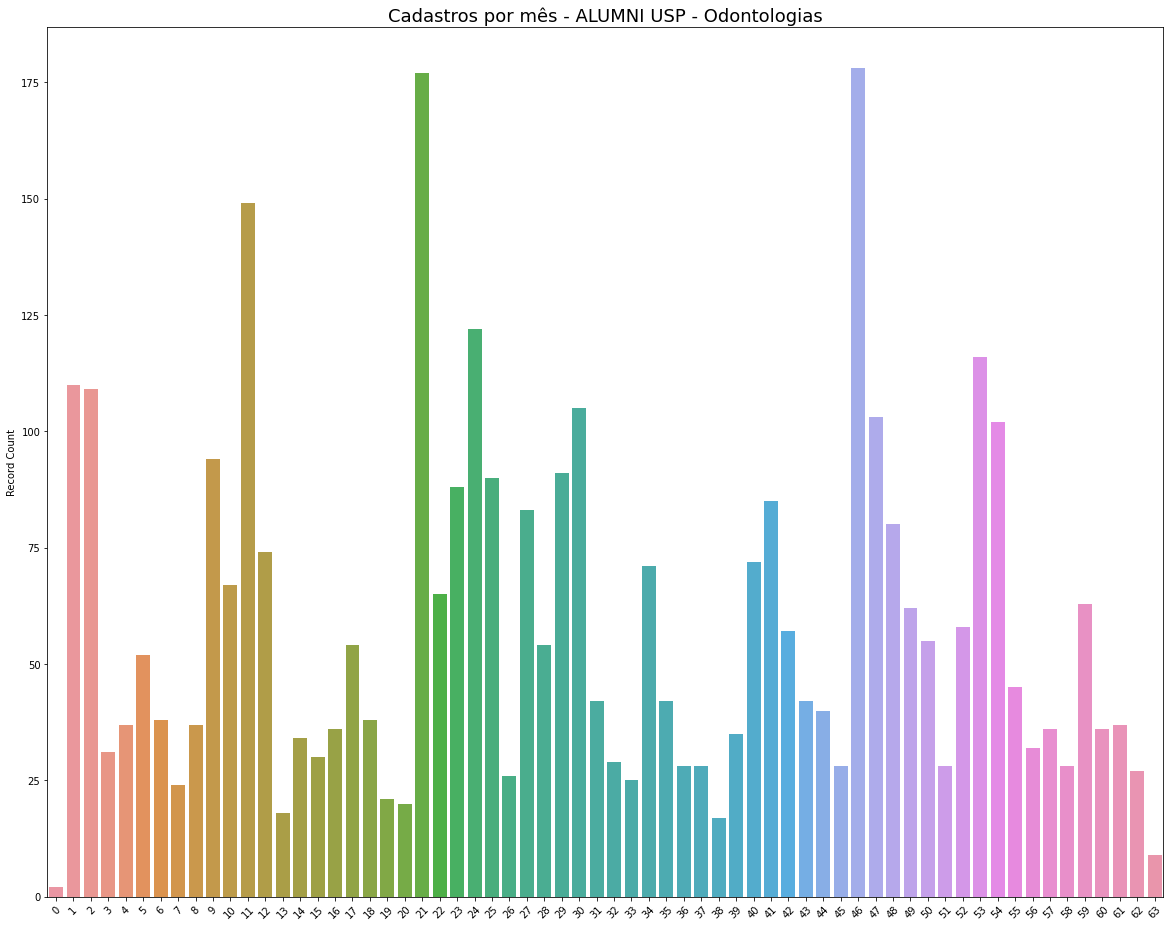

In [33]:
plt.figure(figsize=(20,16))
sns.barplot(data=dados_mes, x=dados_mes.mes_ano.index, y='Record Count',
                 linewidth=5.5)
plt.title('Cadastros por mês - ALUMNI USP - Odontologias', fontsize=18)
plt.xticks(rotation=45)

In [34]:
login_status_estat = dados.groupby(['login_status'])['Record Count'].sum()
login_status_estat 

login_status
Complete      3392
Incomplete     320
Name: Record Count, dtype: int64

(-1.1076166564401362,
 1.1051390594592372,
 -1.1070053587775075,
 1.1003335885132146)

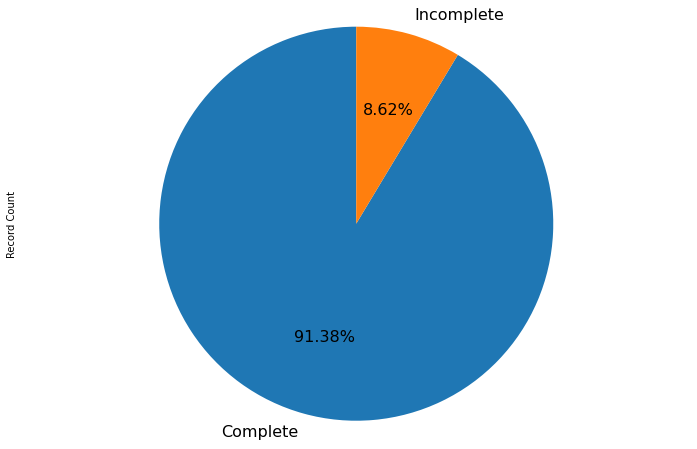

In [35]:
fig = plt.figure(figsize=(12, 8))
login_status_estat.plot(kind='pie', autopct='%.2f%%', startangle=90,textprops={'fontsize': 16})
plt.axis('equal') 

In [36]:
group_record_count_y = dados.groupby(['Y'])['Record Count'].sum()

In [37]:
group_record_count_y

Y
2016    252
2017    654
2018    820
2019    567
2020    830
2021    589
Name: Record Count, dtype: int64

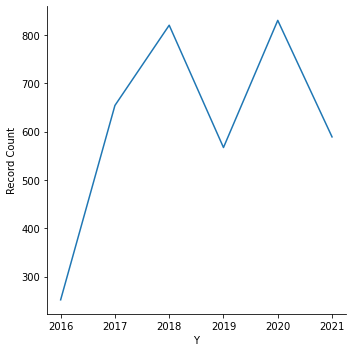

In [38]:
sns.relplot( ci="sd", kind="line", data=group_record_count_y);

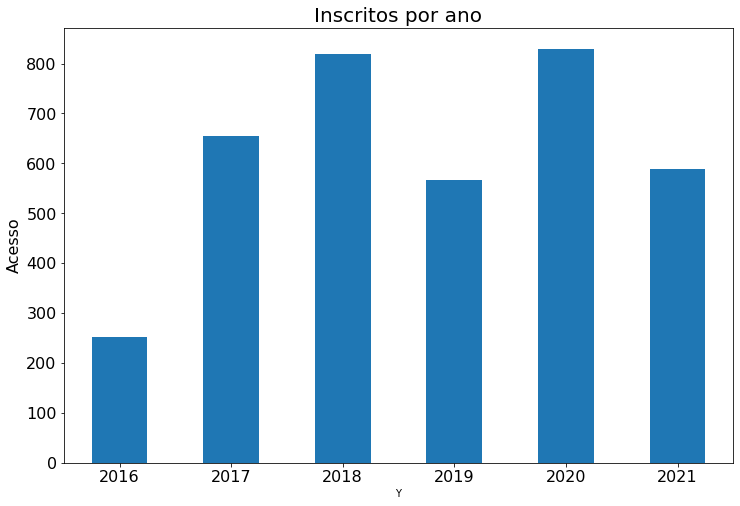

In [39]:
plt.figure(figsize=(12, 8))
group_record_count_y.plot(kind='bar')
plt.title('Inscritos por ano', fontsize=20)
plt.ylabel('Acesso', fontsize=16)
plt.tick_params(labelsize=16)
plt.xticks(rotation=0)
plt.show()

#**O segundo dataframe é do "Acessos à plafatorma - Abrangência"**

In [40]:
dados2 = pd.read_csv("Dashboard Alumni USP_Acesso - Abrangência_Tabela.csv")

In [41]:
dados2

,institution,total_active_inactive,is_inactive,is_active,perc_active,is_complete,perc_complete
0,Faculdade de Odontologia de Bauru,4323,3160,1163,0.269026,1067,0.917455
1,Faculdade de Odontologia,6934,5148,1786,0.257571,1642,0.919373
2,Faculdade de Odontologia de Ribeirão Preto,3957,3194,763,0.192823,683,0.895151


In [42]:
ranking_inscritos = pd.DataFrame()
ranking_inscritos['unidades'] = dados2['institution']
ranking_inscritos['total'] = dados2['is_active']
ranking_inscritos = ranking_inscritos.sort_values(['total'],ascending=False)
ranking_inscritos

,unidades,total
1,Faculdade de Odontologia,1786
0,Faculdade de Odontologia de Bauru,1163
2,Faculdade de Odontologia de Ribeirão Preto,763


In [43]:
inscritos_alumni = ranking_inscritos['total'].sum() 
inscritos_alumni

3712

Total verificado! corresponde perfeito!

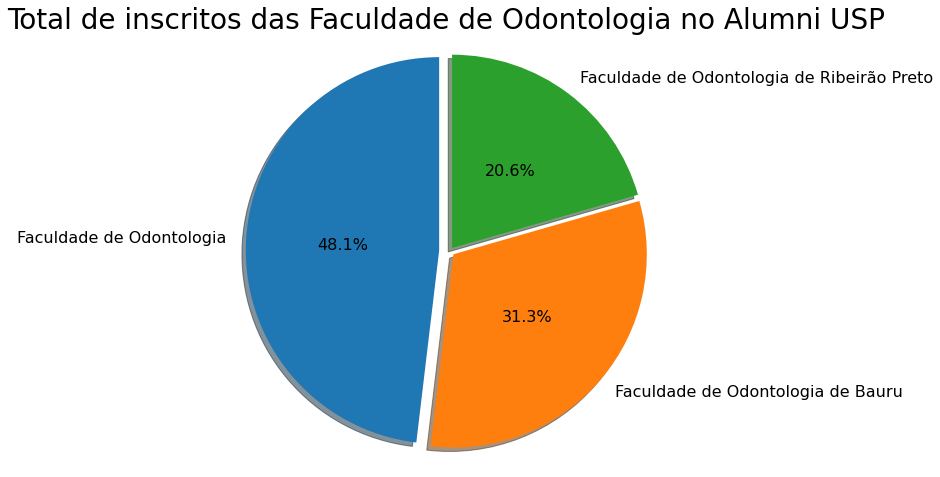

In [44]:
explode = (0.055, 0.025, 0.02)
fig = plt.figure(figsize=(12, 8))
plt.pie(ranking_inscritos['total'], labels=ranking_inscritos['unidades'], explode=explode, shadow = True, startangle=90, autopct='%1.1f%%',pctdistance=0.5, textprops={'fontsize': 16})
plt.title('Total de inscritos das Faculdade de Odontologia no Alumni USP',  fontsize=28)
plt.axis('equal')
plt.show()

Filtrando

In [45]:
ranking_inscritos_abs_top = ranking_inscritos[:10] 
ranking_inscritos_abs_top.to_excel('ranking_inscritos_abs_top.xlsx', sheet_name='Sheet1')
ranking_inscritos_abs_top

,unidades,total
1,Faculdade de Odontologia,1786
0,Faculdade de Odontologia de Bauru,1163
2,Faculdade de Odontologia de Ribeirão Preto,763


**Total de formados nas ODONTOS**

In [46]:
formados_total = pd.DataFrame()
formados_total['unidades'] = dados2['institution']
formados_total['total'] = dados2['total_active_inactive']
formados_total = formados_total.sort_values(['total'],ascending=False)
formados_total

,unidades,total
1,Faculdade de Odontologia,6934
0,Faculdade de Odontologia de Bauru,4323
2,Faculdade de Odontologia de Ribeirão Preto,3957


In [47]:
formados = formados_total['total'].sum() 
formados

15214

**total de inscritos Relativo**

In [48]:
ranking_inscritos_rel = pd.DataFrame()
ranking_inscritos_rel['unidades'] = dados2['institution']
ranking_inscritos_rel['total'] = dados2['perc_active']
ranking_inscritos_rel = ranking_inscritos_rel.sort_values(['total'],ascending=False)
ranking_inscritos_rel

,unidades,total
0,Faculdade de Odontologia de Bauru,0.269026
1,Faculdade de Odontologia,0.257571
2,Faculdade de Odontologia de Ribeirão Preto,0.192823


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



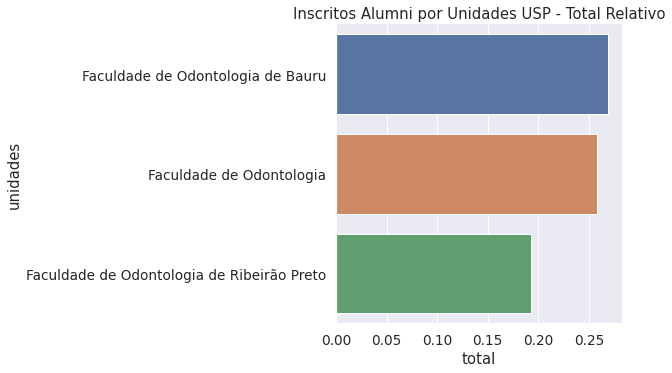

In [49]:
sns.set(font_scale = 1.24)
g = sns.catplot(data= ranking_inscritos_rel, x='total',y='unidades', kind="bar")
g.set(title = "Inscritos Alumni por Unidades USP - Total Relativo")

filtrando

In [50]:
ranking_inscritos_rel_top = ranking_inscritos_rel[:10] 
ranking_inscritos_rel_top['total'] = ranking_inscritos_rel_top['total']*100
ranking_inscritos_rel_top.to_excel('ranking_inscritos_rel_top.xlsx', sheet_name='Sheet1')
ranking_inscritos_rel_top

,unidades,total
0,Faculdade de Odontologia de Bauru,26.902614
1,Faculdade de Odontologia,25.757139
2,Faculdade de Odontologia de Ribeirão Preto,19.282285


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



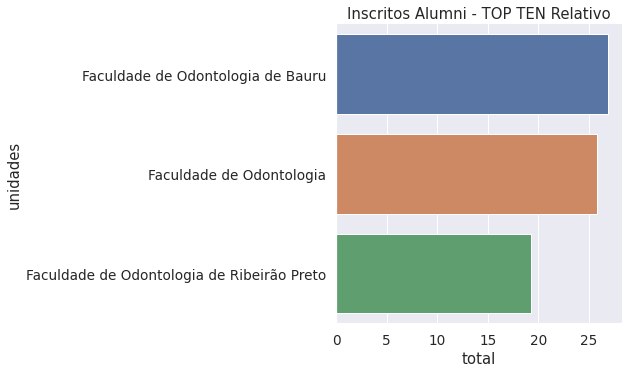

In [51]:
sns.set(font_scale = 1.24)
g = sns.catplot(data= ranking_inscritos_rel_top, x='total',y='unidades', kind="bar")
g.set(title = "Inscritos Alumni - TOP TEN Relativo")

**Perfil completo ou incompleto - Total**

In [52]:
ranking_perfil_completo = pd.DataFrame()
ranking_perfil_completo['unidades'] = dados2['institution']
ranking_perfil_completo['total'] = dados2['is_complete']
ranking_perfil_completo = ranking_perfil_completo.sort_values(['total'],ascending=False)
ranking_perfil_completo

,unidades,total
1,Faculdade de Odontologia,1642
0,Faculdade de Odontologia de Bauru,1067
2,Faculdade de Odontologia de Ribeirão Preto,683


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



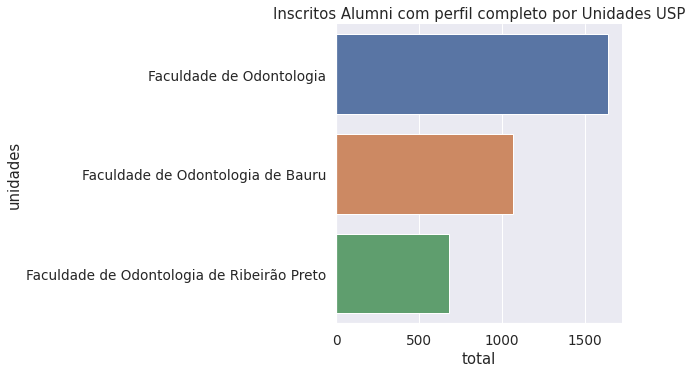

In [53]:
sns.set(font_scale = 1.24)
g = sns.catplot(data= ranking_perfil_completo, x='total',y='unidades', kind="bar")
g.set(title = "Inscritos Alumni com perfil completo por Unidades USP")

filtrando

In [54]:
ranking_perfil_completo = ranking_perfil_completo[:10] 
ranking_perfil_completo.to_excel('ranking_perfil_completo.xlsx', sheet_name='Sheet1')
ranking_perfil_completo

,unidades,total
1,Faculdade de Odontologia,1642
0,Faculdade de Odontologia de Bauru,1067
2,Faculdade de Odontologia de Ribeirão Preto,683


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



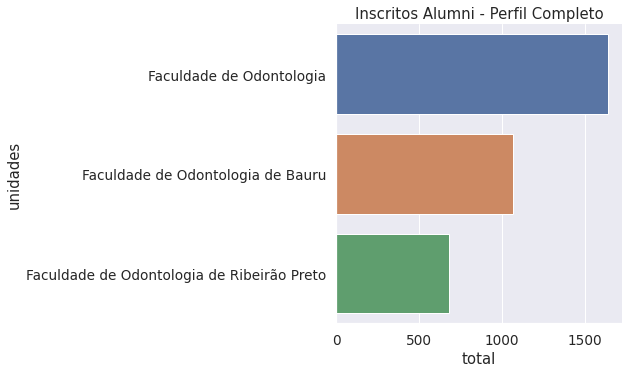

In [55]:
sns.set(font_scale = 1.24)
g = sns.catplot(data= ranking_perfil_completo, x='total',y='unidades', kind="bar")
g.set(title = "Inscritos Alumni - Perfil Completo")

**Perfil completo ou incompleto - Relativo**

In [56]:
ranking_perfil_completo_rel = pd.DataFrame()
ranking_perfil_completo_rel['unidades'] = dados2['institution']
ranking_perfil_completo_rel['total'] = dados2['perc_complete']
ranking_perfil_completo_rel = ranking_perfil_completo_rel.sort_values(['total'],ascending=False)
ranking_perfil_completo_rel

,unidades,total
1,Faculdade de Odontologia,0.919373
0,Faculdade de Odontologia de Bauru,0.917455
2,Faculdade de Odontologia de Ribeirão Preto,0.895151


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



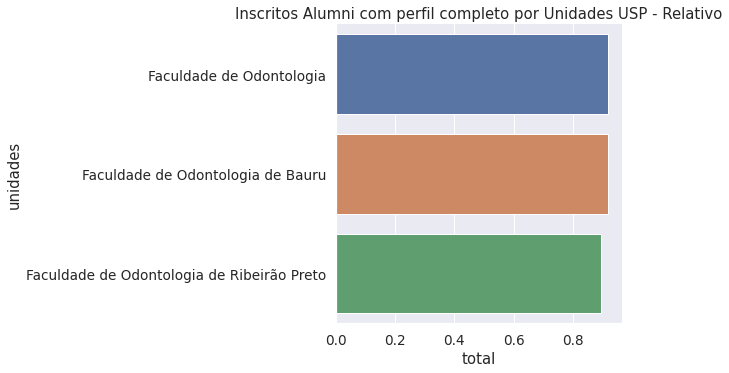

In [57]:
sns.set(font_scale = 1.24)
g = sns.catplot(data= ranking_perfil_completo_rel, x='total',y='unidades', kind="bar")
g.set(title = "Inscritos Alumni com perfil completo por Unidades USP - Relativo")

#**O Terceiro DataFrame é:"Acessos à plafatorma - Demográfico"**<br>
Essa parte no dashboard divide em duas tabelas, no qual podemos exportar dois csv, logo, são dois arquivos.

In [65]:
dados3_1 = pd.read_csv("Dashboard Alumni USP_Acesso  - Demográfico_Tabela.csv")
dados3_2 = pd.read_csv("Dashboard Alumni USP_Acesso  - Demográfico_Tabela dinâmica.csv")
dados3_3 = pd.read_csv("Dashboard Alumni USP_Acesso  - Demográfico_Gráfico de pizza.csv")

In [63]:
dados3_1

,periodstartyear,total_active_inactive,is_inactive,is_active,perc_active,is_complete,perc_complete
0,2020,7,5,2,0.285714,2,1.000000
1,2019,61,39,22,0.360656,19,0.863636
2,2018,100,39,61,0.610000,59,0.967213
3,2017,180,77,103,0.572222,95,0.922330
4,2016,328,138,190,0.579268,183,0.963158
5,2015,422,176,246,0.582938,238,0.967480
6,2014,394,190,204,0.517766,190,0.931373
7,2013,366,163,203,0.554645,191,0.940887
8,2012,369,207,162,0.439024,156,0.962963
9,2011,447,268,179,0.400447,171,0.955307


In [64]:
dados3_2

,age,Record Count,Record Count.1
0,Entre 41 e 50,949,0.255657
1,Entre 31 e 40,1245,0.335399
2,Entre 51 e 60,478,0.128772
3,Entre 26 e 30,645,0.173761
4,Entre 61 e 70,131,0.035291
5,Entre 71 e 80,11,0.002963
6,Entre 91 ou mais,1,0.000269
7,Entre 21 e 25,252,0.067888


In [66]:
dados3_3

,genre,Record Count
0,Male,168276
1,Female,160037


#**O quinto DataFrame é: "Status Profissional"**<br>
Essa parte no dashboard divide em duas tabelas, no qual podemos exportar dois csv, logo, são dois arquivos.

In [67]:
dados5 = pd.read_csv("Dashboard Alumni USP_Status Profissional_Tabela dinâmica.csv")

In [68]:
dados5

,prof_status,Y,Record Count
0,Sou Empregado ou Servidor Público,2019,389
1,Sou Empregado ou Servidor Público,2018,627
2,Sou Profissional Liberal,2017,34
3,Sou Empregado,2016,9
4,-,2017,397
...,...,...,...
78,Nenhuma das anteriores,2016,2
79,Estou Procurando Emprego,2021,27
80,Procuro meu Primeiro Emprego,2017,4
81,Procuro meu Primeiro Emprego,2019,39


In [69]:
prof_status_total = dados5.groupby(by="prof_status")['Record Count'].sum().sort_values(ascending=False)
prof_status_total

prof_status
Sou Empregado ou Servidor Público    1409
Sou Profissional Liberal              510
-                                     482
Sou Empregado                         187
Procuro meu Primeiro Emprego          148
Sou Estudante com Bolsa               104
Sou Servidor Público Estadual          90
Sou Empreendedor                       83
Sou Estudante                          79
Estou Procurando Emprego               79
Sou Servidor Público Municipal         76
Sou Servidor Público Federal           60
Nenhuma das anteriores                 42
Sou Pós-doutorando                     35
Estou Aposentado                        8
Name: Record Count, dtype: int64

In [70]:
dados5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prof_status   83 non-null     object
 1   Y             83 non-null     int64 
 2   Record Count  83 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.1+ KB


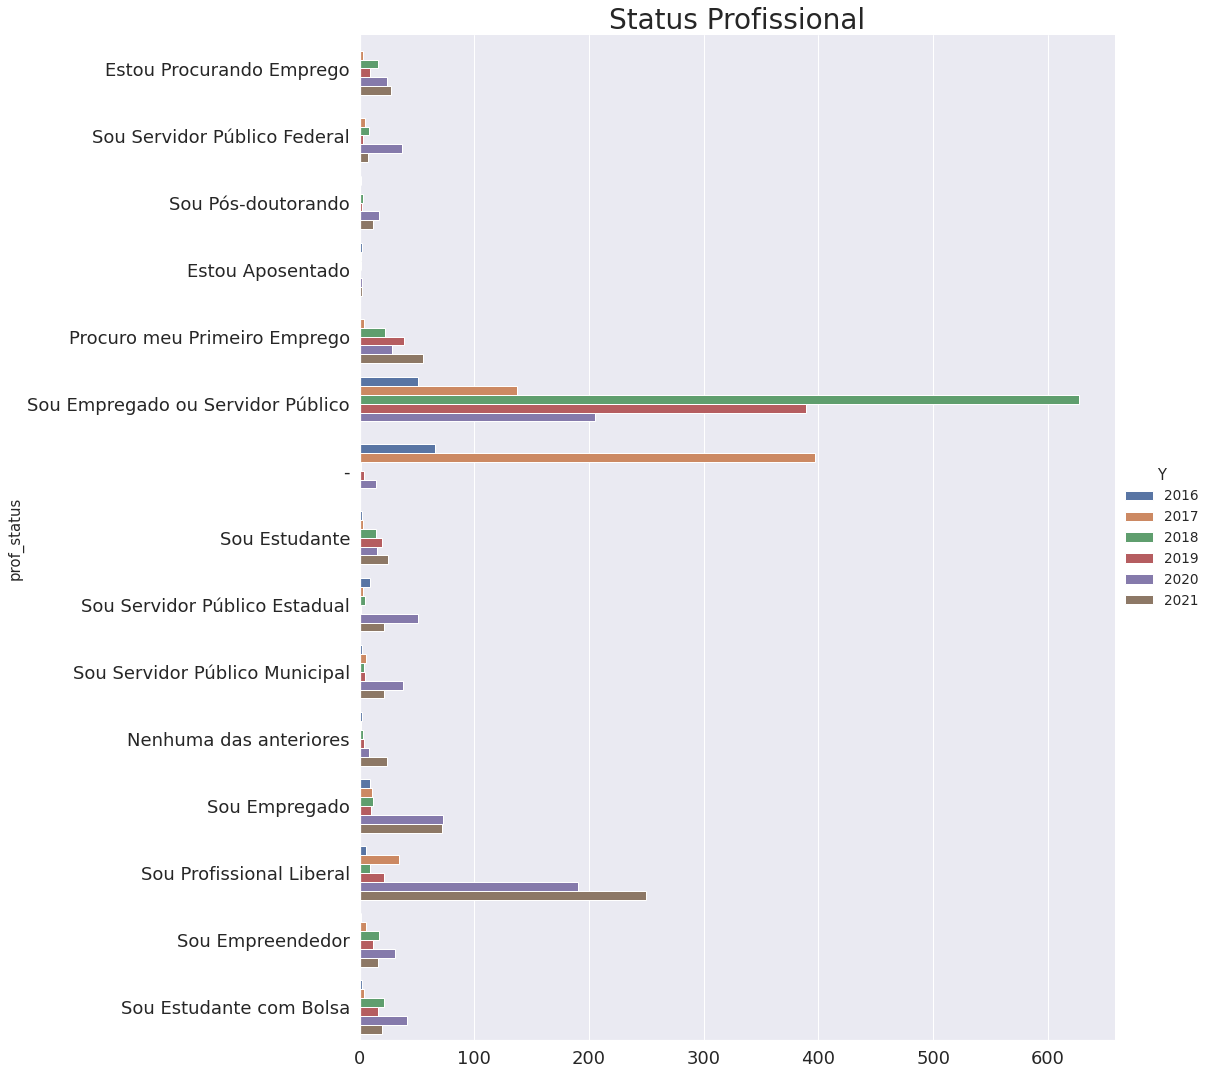

In [71]:
sns.catplot( y="prof_status", x="Record Count", hue="Y", estimator=np.sum, order = dados5['prof_status'].value_counts().sort_values(ascending=True).index,
            kind="bar", 
            data=dados5, height=15)
plt.title('Status Profissional', fontsize=28)
plt.xlabel('', fontsize=20)
plt.tick_params(labelsize=18)
plt.show()

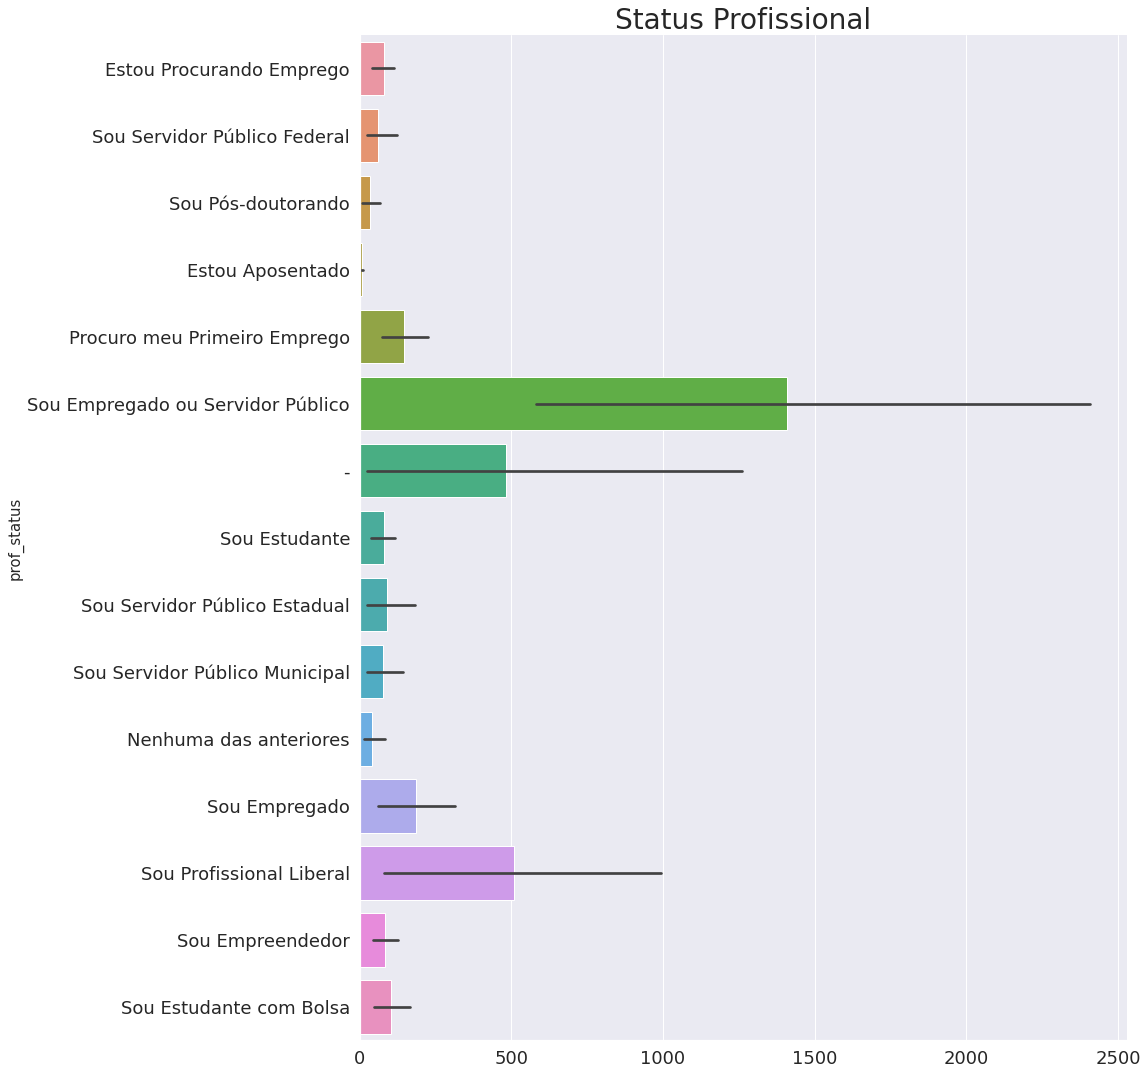

In [72]:
sns.catplot( y="prof_status", x="Record Count", estimator=np.sum, order = dados5['prof_status'].value_counts().sort_values(ascending=True).index,
            kind="bar", 
            data=dados5, height=15)
plt.title('Status Profissional', fontsize=28)
plt.xlabel('', fontsize=20)
plt.tick_params(labelsize=18)
plt.show()

#**O sexto DataFrame é: "Área de Atuação"**


In [73]:
dados6 = pd.read_csv("Dashboard Alumni USP_Área de Atuação_Tabela dinâmica.csv")

In [74]:
dados6

,prof_field,Y,Record Count
0,na mesma área de todas minhas formações na USP,2019,405
1,na mesma área de todas minhas formações na USP,2018,641
2,na mesma área da minha Graduação na USP,2017,8
3,na mesma área de todas minhas formações na USP,2016,66
4,-,2017,397
5,em outra área,2020,43
6,na mesma área da minha Pós-Graduação na USP,2017,23
7,-,2016,65
8,em outra área,2018,34
9,na mesma área de todas minhas formações na USP,2017,159


Total de respostas:

In [75]:
dados6['Record Count'].sum()


3392

In [76]:
area_atuacao = pd.DataFrame()
area_atuacao['unidades'] = dados6['prof_field']
area_atuacao['total'] = dados6['Record Count']
area_atuacao = area_atuacao.sort_values(['total'],ascending=False)
area_atuacao

,unidades,total
1,na mesma área de todas minhas formações na USP,641
0,na mesma área de todas minhas formações na USP,405
4,-,397
14,na mesma área da minha Graduação na USP,323
10,na mesma área de todas minhas formações na USP,316
11,na mesma área da minha Pós-Graduação na USP,189
9,na mesma área de todas minhas formações na USP,159
20,na mesma área da minha Graduação na USP,144
12,na mesma área da minha Pós-Graduação na USP,121
13,não atuo profissionalmente,81


In [77]:
area_atuacao = area_atuacao.groupby(['unidades'])['total'].sum().sort_values(ascending=False)
area_atuacao 

unidades
na mesma área de todas minhas formações na USP    1651
na mesma área da minha Graduação na USP            503
-                                                  481
na mesma área da minha Pós-Graduação na USP        363
não atuo profissionalmente                         254
em outra área                                      140
Name: total, dtype: int64

In [78]:
area_atuacao = pd.DataFrame(area_atuacao)

In [80]:
area_atu = pd.DataFrame() 
area_atu = area_atu.append(area_atuacao.loc[:])

In [81]:
area_atu.to_excel('area_atuacao.xlsx', sheet_name='Sheet1')

In [89]:
area_atu = pd.read_excel('area_atuacao.xlsx')  

In [90]:
area_atu

,unidades,total
0,na mesma área de todas minhas formações na USP,1651
1,na mesma área da minha Graduação na USP,503
2,-,481
3,na mesma área da minha Pós-Graduação na USP,363
4,não atuo profissionalmente,254
5,em outra área,140


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



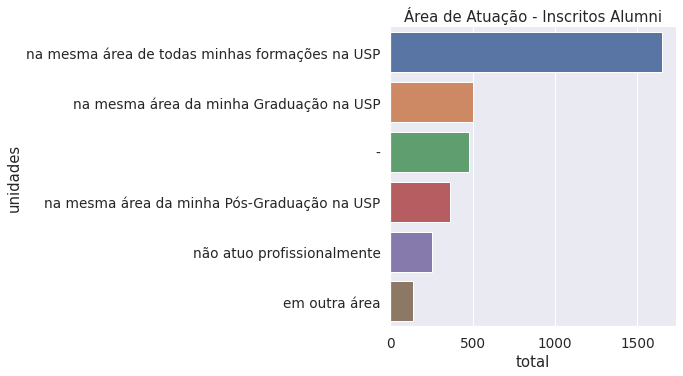

In [92]:
sns.set(font_scale = 1.24)
g = sns.catplot(data= area_atu, y='unidades',x='total', kind="bar")
g.set(title = "Área de Atuação - Inscritos Alumni")

#**O sétimo DataFrame é: " Área de Atuação - por Instituição"**

Dashboard Alumni USP_Área de Atuação - Instituição_Tabela dinâmica

In [96]:
dados7 = pd.read_csv("Dashboard Alumni USP_Área de Atuação - Instituição_Tabela dinâmica.csv")

In [97]:
dados7

,institution,prof_field,Record Count
0,Faculdade de Odontologia,na mesma área de todas minhas formações na USP,791
1,Faculdade de Odontologia,na mesma área da minha Graduação na USP,258
2,Faculdade de Odontologia,-,256
3,Faculdade de Odontologia,em outra área,69
4,Faculdade de Odontologia,na mesma área da minha Pós-Graduação na USP,181
5,Faculdade de Odontologia de Bauru,na mesma área de todas minhas formações na USP,527
6,Faculdade de Odontologia,não atuo profissionalmente,87
7,Faculdade de Odontologia de Ribeirão Preto,na mesma área de todas minhas formações na USP,333
8,Faculdade de Odontologia de Bauru,na mesma área da minha Graduação na USP,119
9,Faculdade de Odontologia de Ribeirão Preto,-,90


In [98]:
dados7['prof_field'].unique()

array(['na mesma área de todas minhas formações na USP',
       'na mesma área da minha Graduação na USP', '-', 'em outra área',
       'na mesma área da minha Pós-Graduação na USP',
       'não atuo profissionalmente'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



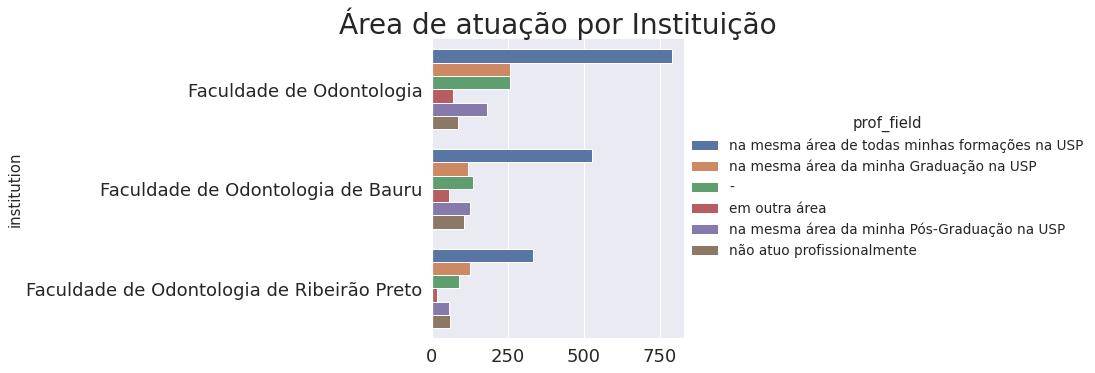

In [106]:
sns.catplot( y="institution", x="Record Count", hue="prof_field", estimator=np.sum, 
            kind="bar", 
            data=dados7)
plt.title('Área de atuação por Instituição', fontsize=28)
plt.xlabel('', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [100]:
mask = dados7['institution'].value_counts().head().index

In [101]:
area_atuacao_intuicao = dados7.groupby(['institution'])['Record Count'].sum().sort_values(ascending=False)
area_atuacao_intuicao 

institution
Faculdade de Odontologia                      1642
Faculdade de Odontologia de Bauru             1067
Faculdade de Odontologia de Ribeirão Preto     683
Name: Record Count, dtype: int64

In [102]:
area_atuacao_intuicao_field = pd.DataFrame()
area_atuacao_intuicao_field['total'] = dados7.groupby(['institution','prof_field'])['Record Count'].sum()
area_atuacao_intuicao_field

total
institution                                prof_field                                           
Faculdade de Odontologia                   -                                                 256
                                           em outra área                                      69
                                           na mesma área da minha Graduação na USP           258
                                           na mesma área da minha Pós-Graduação na USP       181
                                           na mesma área de todas minhas formações na USP    791
                                           não atuo profissionalmente                         87
Faculdade de Odontologia de Bauru          -                                                 135
                                           em outra área                                      55
                                           na mesma área da minha Graduação na USP           119
                                           na mesma área da minha Pós-Graduação na USP       125
                                           na mesma área de todas minhas formações na USP    527
                                           não atuo profissionalmente                        106
Faculdade de Odontologia de Ribeirão Preto -                                                  90
                                           em outra área                                      16
                                           na mesma área da minha Graduação na USP           126
                                           na mesma área da minha Pós-Graduação na USP        57
                                           na mesma área de todas minhas formações na USP    333
                                           não atuo profissionalmente                         61

Confere!

In [103]:
area_atuacao_2 = dados7.groupby(['prof_field'])['Record Count'].sum().sort_values(ascending=False)
area_atuacao_2

prof_field
na mesma área de todas minhas formações na USP    1651
na mesma área da minha Graduação na USP            503
-                                                  481
na mesma área da minha Pós-Graduação na USP        363
não atuo profissionalmente                         254
em outra área                                      140
Name: Record Count, dtype: int64

(-1.1099911225583676,
 1.1004757719817526,
 -1.111878122386054,
 1.1109138131769056)

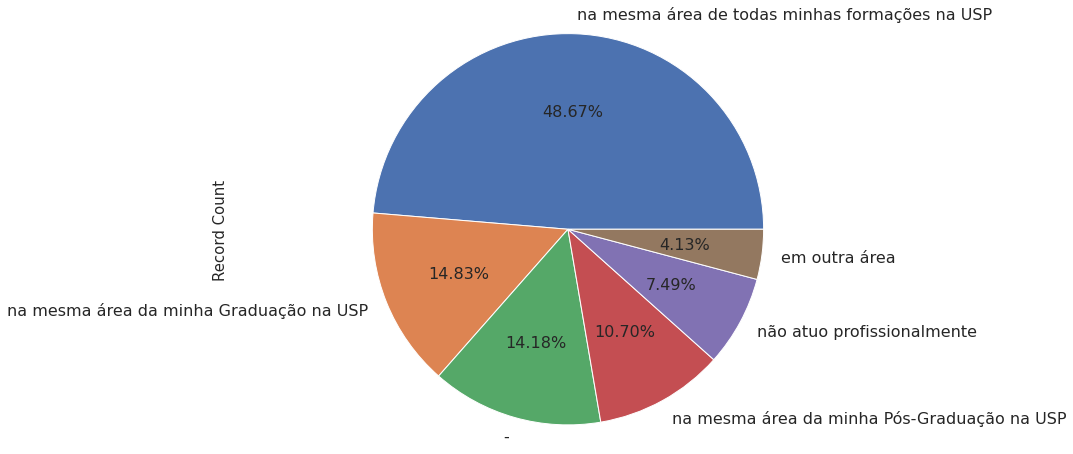

In [104]:
fig = plt.figure(figsize=(12, 8))
area_atuacao_2.plot(kind='pie', autopct='%.2f%%', startangle=0,textprops={'fontsize': 16})
plt.axis('equal') 

#**'na mesma área de todas minhas formações na USP'**

In [107]:
data7_0 = dados7.loc[dados7['prof_field'] == 'na mesma área de todas minhas formações na USP']
data7_0 = pd.DataFrame(data7_0)

In [111]:
cols = data7_0.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str)) else x)
data7_0.columns = cols 
data7_0

,institution,prof_field,Record_Count
0,Faculdade de Odontologia,na mesma área de todas minhas formações na USP,791
5,Faculdade de Odontologia de Bauru,na mesma área de todas minhas formações na USP,527
7,Faculdade de Odontologia de Ribeirão Preto,na mesma área de todas minhas formações na USP,333


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



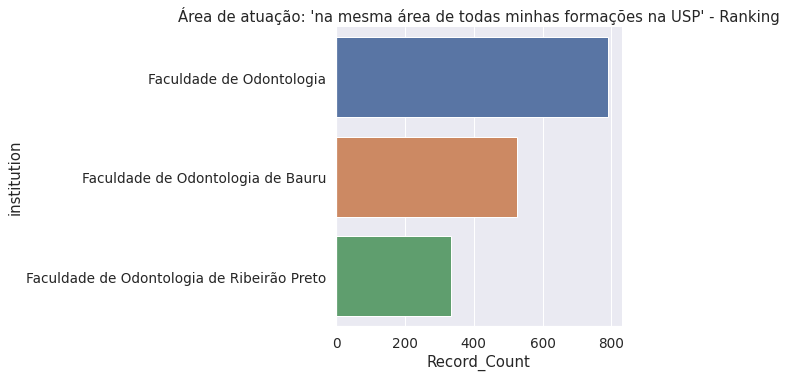

In [112]:
sns.set(font_scale = 1.24)
g = sns.catplot(y="institution", x="Record_Count", data=data7_0, kind="bar")
g.set(title = "Área de atuação: 'na mesma área de todas minhas formações na USP' - Ranking")

#**'na mesma área da minha Graduação na USP'**

In [113]:
data7_1 = dados7.loc[dados7['prof_field'] == 'na mesma área da minha Graduação na USP']
data7_1 = pd.DataFrame(data7_1)

In [114]:
cols = data7_1.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str)) else x)
data7_1.columns = cols 

In [117]:
data7_1

,institution,prof_field,Record_Count
1,Faculdade de Odontologia,na mesma área da minha Graduação na USP,258
8,Faculdade de Odontologia de Bauru,na mesma área da minha Graduação na USP,119
16,Faculdade de Odontologia de Ribeirão Preto,na mesma área da minha Graduação na USP,126


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



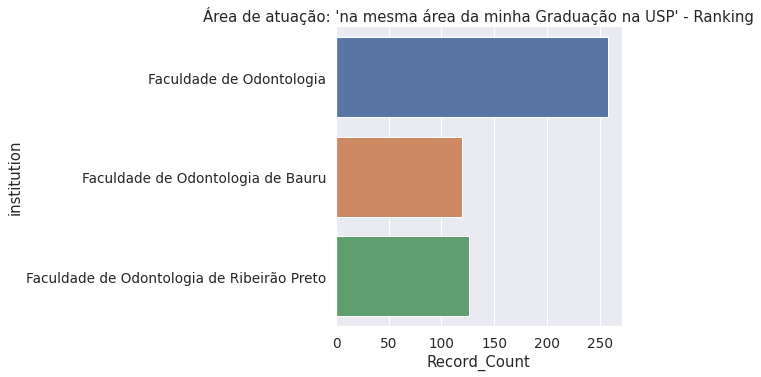

In [119]:
sns.set(font_scale = 1.24)
g = sns.catplot(y="institution", x="Record_Count", data=data7_1, kind="bar")
g.set(title = "Área de atuação: 'na mesma área da minha Graduação na USP' - Ranking")

#**'na mesma área da minha Pós-Graduação na USP'**

In [120]:
data7_2 = dados7.loc[dados7['prof_field'] == 'na mesma área da minha Pós-Graduação na USP']
data7_2 = pd.DataFrame(data7_2)

In [121]:
cols = data7_2.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str)) else x)
data7_2.columns = cols 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



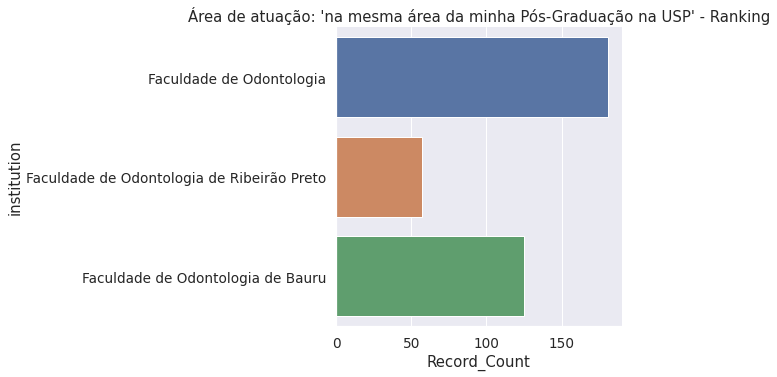

In [125]:
sns.set(font_scale = 1.24)
g = sns.catplot(y="institution", x="Record_Count", data=data7_2, kind="bar")
g.set(title = "Área de atuação: 'na mesma área da minha Pós-Graduação na USP' - Ranking")

#**'em outra área'**

In [126]:
data7_3 = dados7.loc[dados7['prof_field'] == 'em outra área']
data7_3 = pd.DataFrame(data7_3)

In [127]:
cols = data7_3.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str)) else x)
data7_3.columns = cols 

In [128]:
data7_3

,institution,prof_field,Record_Count
3,Faculdade de Odontologia,em outra área,69
12,Faculdade de Odontologia de Ribeirão Preto,em outra área,16
14,Faculdade de Odontologia de Bauru,em outra área,55


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



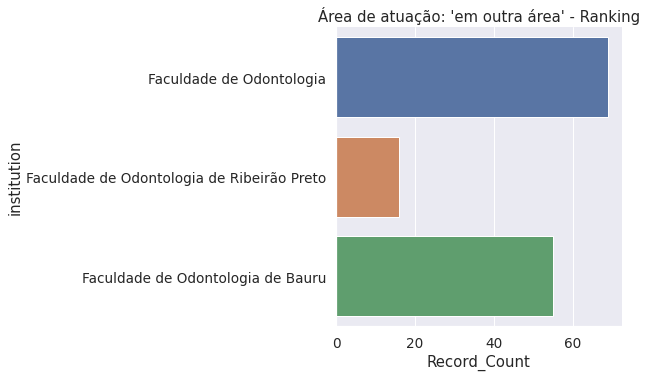

In [129]:
sns.set(font_scale = 1.24)
g = sns.catplot(y="institution", x="Record_Count", data=data7_3, kind="bar")
g.set(title = "Área de atuação: 'em outra área' - Ranking")

#**'não atuo profissionalmente'**

In [130]:
data7_4 = dados7.loc[dados7['prof_field'] == 'não atuo profissionalmente']
data7_4 = pd.DataFrame(data7_4)

In [131]:
cols = data7_4.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str)) else x)
data7_4.columns = cols 

In [132]:
data7_4

,institution,prof_field,Record_Count
6,Faculdade de Odontologia,não atuo profissionalmente,87
11,Faculdade de Odontologia de Bauru,não atuo profissionalmente,106
15,Faculdade de Odontologia de Ribeirão Preto,não atuo profissionalmente,61


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



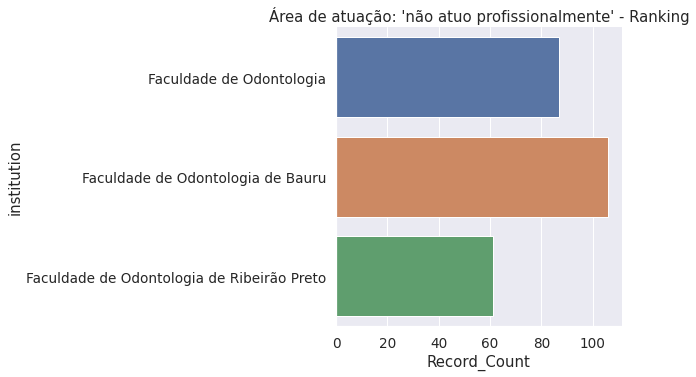

In [133]:
sns.set(font_scale = 1.24)
g = sns.catplot(y="institution", x="Record_Count", data=data7_4, kind="bar")
g.set(title = "Área de atuação: 'não atuo profissionalmente' - Ranking")

#**'-'** - Resposta Nula

In [134]:
data7_5 = dados7.loc[dados7['prof_field'] == '-']
data7_5 = pd.DataFrame(data7_5)

In [135]:
cols = data7_5.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str)) else x)
data7_5.columns = cols 

In [136]:
data7_5

,institution,prof_field,Record_Count
2,Faculdade de Odontologia,-,256
9,Faculdade de Odontologia de Ribeirão Preto,-,90
10,Faculdade de Odontologia de Bauru,-,135


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



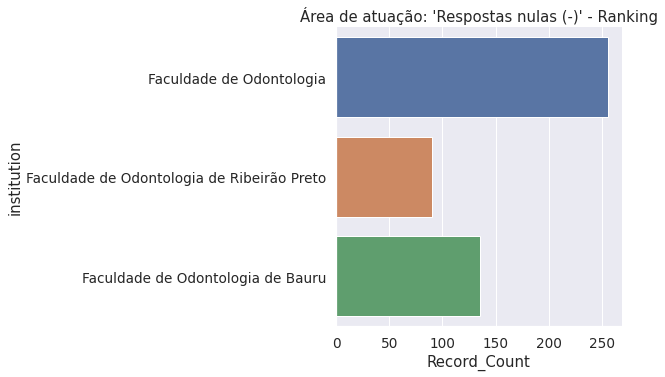

In [137]:
sns.set(font_scale = 1.24)
g = sns.catplot(y="institution", x="Record_Count", data=data7_5, kind="bar")
g.set(title = "Área de atuação: 'Respostas nulas (-)' - Ranking")

#**O oitavo DataFrame é: " Área de Atuação - Empreendedores"**

In [138]:
dados8 = pd.read_csv("Dashboard Alumni USP_Empreendedores_Tabela dinâmica.csv")
dados8

,institution,genre,Record Count
0,Faculdade de Odontologia,Male,18
1,Faculdade de Odontologia,Female,27
2,Faculdade de Odontologia de Bauru,Male,11
3,Faculdade de Odontologia de Bauru,Female,17
4,Faculdade de Odontologia de Ribeirão Preto,Male,5
5,Faculdade de Odontologia de Ribeirão Preto,Female,5


In [139]:
empreenda_genre = dados8.groupby(by="genre")['Record Count'].sum().sort_values(ascending=False)

In [140]:
empreenda_genre

genre
Female    49
Male      34
Name: Record Count, dtype: int64

(-1.1132529556212054,
 1.1221734096578648,
 -1.111253654595843,
 1.1005358883140877)

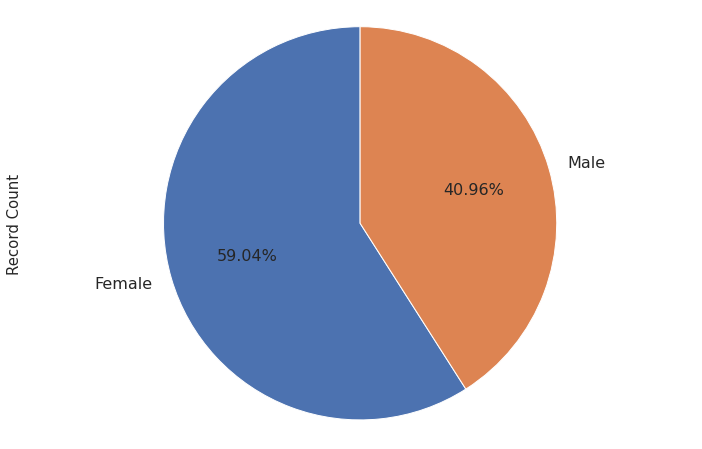

In [141]:
fig = plt.figure(figsize=(12, 8))
empreenda_genre.plot(kind='pie', autopct='%.2f%%', startangle=90,textprops={'fontsize': 16})
plt.axis('equal') 

In [142]:
empreenda = dados8.groupby(by="institution")['Record Count'].sum().sort_values(ascending=False)

In [143]:
empreenda

institution
Faculdade de Odontologia                      45
Faculdade de Odontologia de Bauru             28
Faculdade de Odontologia de Ribeirão Preto    10
Name: Record Count, dtype: int64

In [144]:
empreenda_ranking = pd.DataFrame()
empreenda_ranking['unidades'] = dados8['institution']
empreenda_ranking['genero'] = dados8['genre']
empreenda_ranking['total'] = dados8['Record Count']
empreenda_ranking = empreenda_ranking.sort_values(['total'],ascending=False)
empreenda_ranking

,unidades,genero,total
1,Faculdade de Odontologia,Female,27
0,Faculdade de Odontologia,Male,18
3,Faculdade de Odontologia de Bauru,Female,17
2,Faculdade de Odontologia de Bauru,Male,11
4,Faculdade de Odontologia de Ribeirão Preto,Male,5
5,Faculdade de Odontologia de Ribeirão Preto,Female,5


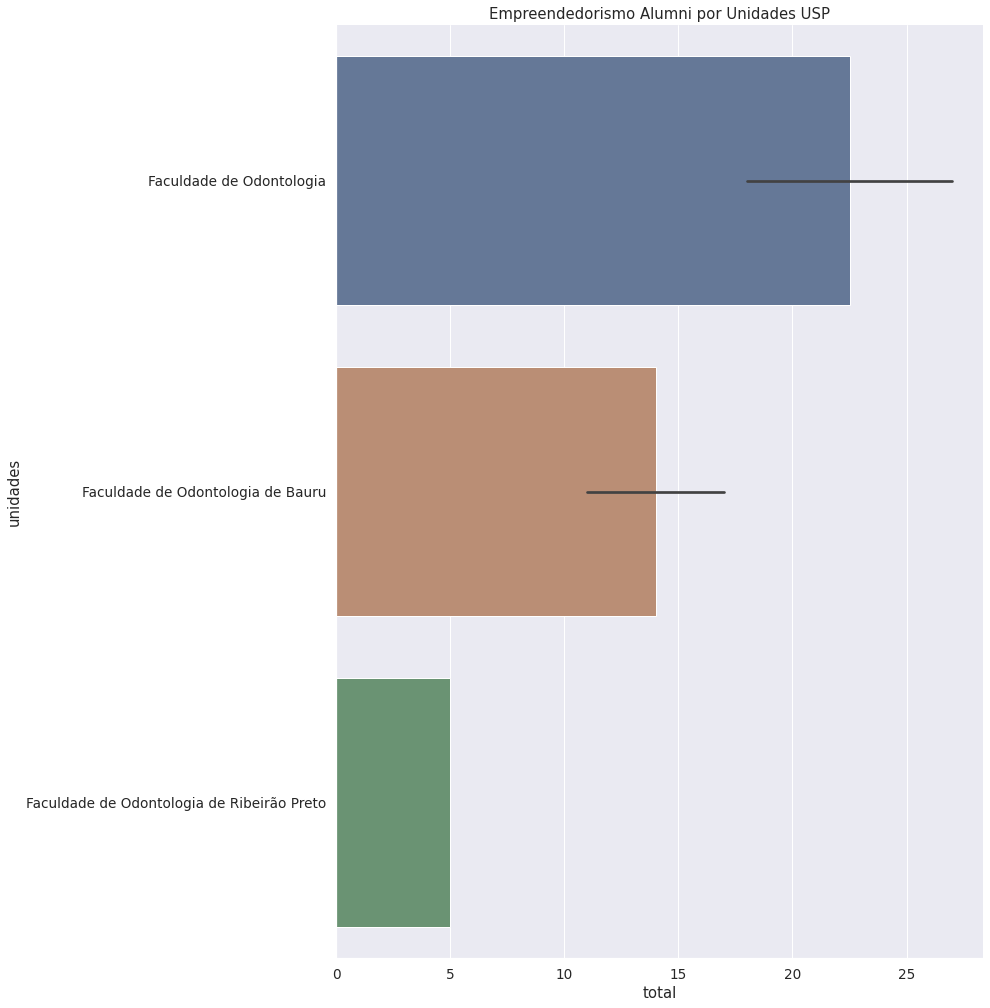

In [145]:
sns.set(font_scale = 1.24)
g = sns.catplot(data= empreenda_ranking, x='total',y='unidades', kind="bar", height=14,saturation=.5)
g.set(title = "Empreendedorismo Alumni por Unidades USP")

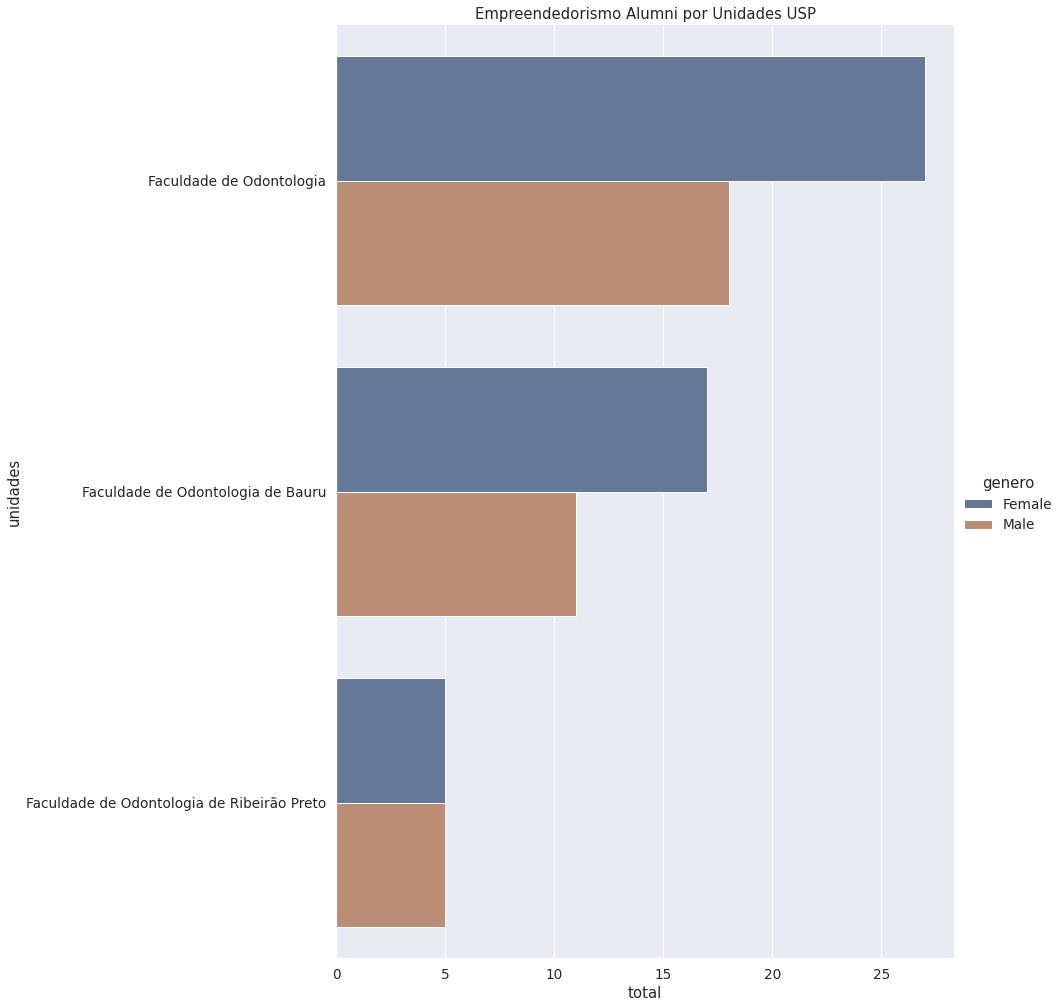

In [146]:
sns.set(font_scale = 1.24)
g = sns.catplot(data= empreenda_ranking, x='total',y='unidades',hue="genero", kind="bar", height=14,saturation=.5)
g.set(title = "Empreendedorismo Alumni por Unidades USP")

In [147]:
empreenda_ranking_filtro = pd.DataFrame()
empreenda_ranking_filtro['total'] = empreenda_ranking.groupby(by="unidades", as_index=True)['total'].sum().sort_values(ascending=False)
empreenda_ranking_filtro = empreenda_ranking_filtro[:10]
empreenda_ranking_filtro.reset_index(inplace=True)

In [148]:
empreenda_ranking_filtro

,unidades,total
0,Faculdade de Odontologia,45
1,Faculdade de Odontologia de Bauru,28
2,Faculdade de Odontologia de Ribeirão Preto,10


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



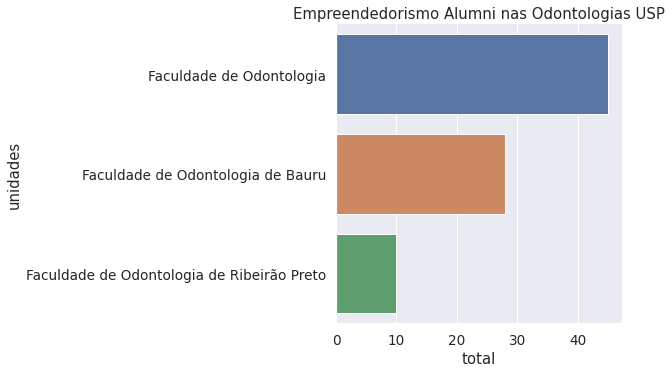

In [155]:
g = sns.catplot(data= empreenda_ranking_filtro, x='total',y='unidades', kind="bar")
g.set(title = "Empreendedorismo Alumni nas Odontologias USP")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



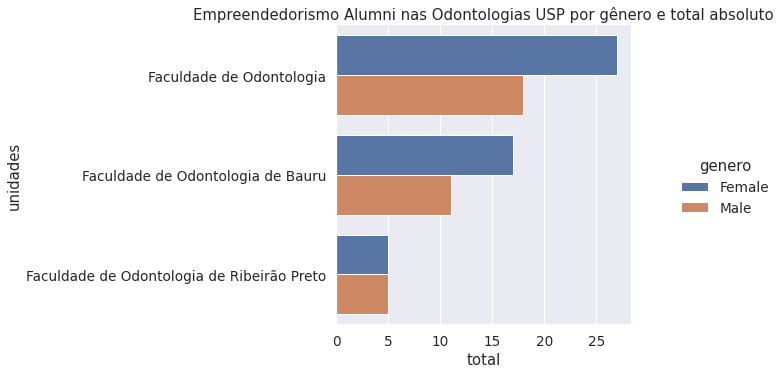

In [153]:
sns.set(font_scale = 1.24)
g = sns.catplot(data= empreenda_ranking, x='total',y='unidades',hue="genero", kind="bar")
g.set(title = "Empreendedorismo Alumni nas Odontologias USP por gênero e total absoluto")